# Warsztaty badawcze
# Praca domowa nr 1
Adrianna Grudzień

4 marca 2021 r.

W ramach pracy domowej nr 1 z przedmiotu *Warsztaty badawcze* postawiłam 5 hipotez, które następnie sprawdziłam przy pomocy narzędzi *matplotlib* oraz *seaborn* w pythonie. Analizowałam dane ze strony  https://archive.ics.uci.edu/ml/datasets/Student+Performance.

Postawiłam następujące hipotezy:
* ***Hipoteza nr 1:*** Uczniowie niemający dostępu do internetu chętniej podejmują się zdobycia wyższego wykształcenia.
* ***Hipoteza nr 2:*** Starsi uczniowie mają więcej nieobecności.
* ***Hipoteza nr 3:*** Uczniowie mający więcej wolnego czasu są mniej zdrowi.
* ***Hipoteza nr 4:*** Uczniowie mający rozwiedzionych rodziców dostają gorsze oceny.
* ***Hipoteza nr 5:*** Uczniowie poświęcający więcej czasu na dojazd mają lepsze oceny.

In [3]:
# pobranie potrzebnych bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# wczytanie danych
students = pd.read_csv('student-mat.csv', delimiter=';')
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


***Hipoteza nr 1:***
Uczniowie niemający dostępu do internetu chętniej podejmują się zdobycia wyższego wykształcenia.

In [5]:
# higher - wants to take higher education (binary: yes or no)
# internet - Internet access at home (binary: yes or no)

In [6]:
# tworzymy nową ramkę danych dla skupienia uwagi
students1 = students.groupby(['higher','internet']).size().reset_index(name='count')
students1.head()

,higher,internet,count
0,no,no,4
1,no,yes,16
2,yes,no,62
3,yes,yes,313


In [7]:
# rozdzielamy na dwie ramki danych:
withHigher = students1[students1.higher == 'yes'].reset_index(drop=True)
noHigher = students1[students1.higher == 'no'].reset_index(drop=True)

# sumujemy uczniów, którzy chcą/nie chcą studiować:
internetSum = students1.groupby('internet').sum().reset_index()

In [8]:
withHigher

,higher,internet,count
0,yes,no,62
1,yes,yes,313


In [9]:
noHigher

,higher,internet,count
0,no,no,4
1,no,yes,16


In [10]:
internetSum

,internet,count
0,no,66
1,yes,329


In [11]:
# tworzymy nową kolumnę 'percent':
percentWithHigher = [withHigher['count'][0] / internetSum['count'][0] * 100, withHigher['count'][1] / internetSum['count'][1] * 100]
withHigher['percent'] = percentWithHigher

percentNoHigher = [noHigher['count'][0] / internetSum['count'][0] * 100, noHigher['count'][1] / internetSum['count'][1] * 100]
noHigher['percent'] = percentNoHigher

In [12]:
withHigher

,higher,internet,count,percent
0,yes,no,62,93.939394
1,yes,yes,313,95.136778


In [13]:
noHigher

,higher,internet,count,percent
0,no,no,4,6.060606
1,no,yes,16,4.863222


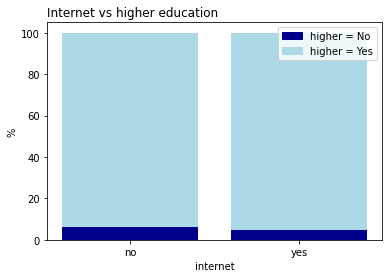

In [14]:
# budujemy wykres
bar1 = plt.bar('internet', 'percent', data=noHigher,
           color='darkblue')
bar2 = plt.bar('internet', 'percent', data=withHigher,
           color='lightblue', bottom=noHigher['percent'])

import matplotlib.patches as mpatches
# dodajemy legendę
top_bar = mpatches.Patch(color='darkblue', label='higher = No')
bottom_bar = mpatches.Patch(color='lightblue', label='higher = Yes')
plt.legend(handles=[top_bar, bottom_bar])

plt.title('Internet vs higher education', loc='left')

# dodajemy nazwy osi
plt.xlabel('internet')
plt.ylabel('%')

plt.show()

***Wniosek nr 1:*** Okazuje się, że wśród uczniów nieposiadających dostępu do internetu odsetek tych chcących zdobyć wyższe wykształcenie jest mniejszy. Przy czym różnica jest stosunkowo mała.

***Hipoteza nr 2:*** Starsi uczniowie mają więcej nieobecności.

Text(0.0, 1.0, 'Age vs absences')

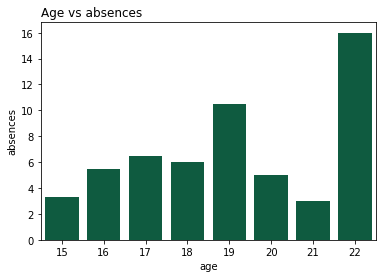

In [15]:
sns.barplot(x='age',y='absences', data=students,
           ci=None, color='#026843')
plt.title('Age vs absences', loc='left')

***Wniosek nr 2:*** Nie można jednoznacznie stwierdzić. Możemy jednakże zauważyć pewną prawidłowość - mianowicie, zaczynając od wieku 15 lat uczniowie coraz chętniej wagarują. W wieku 17 lat, z kolei, być może zawuażają, że wagary się nie opłacają, więc z średnia liczba nieobecności maleje. Co ciekawe, możemy zaobserwować nagły skok liczby nieobecności u uczniów w wieku 19 i 22 lat.

***Hipoteza nr 3:*** Uczniowie mający więcej wolnego czasu są mniej zdrowi.

In [16]:
# freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# health - current health status (numeric: from 1 - very bad to 5 - very good)

In [17]:
students3 = students[['freetime', 'health']]
students3.head()

,freetime,health
0,3,3
1,3,3
2,3,3
3,2,5
4,3,5


Text(0.0, 1.0, 'Freetime vs health')

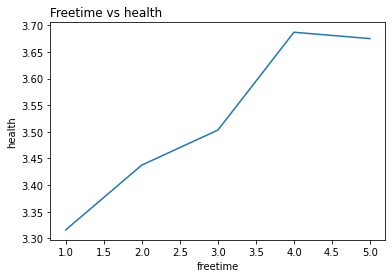

In [18]:
bar = sns.lineplot(x='freetime',y='health',data=students3,
            dashes='', ci=None)
plt.title('Freetime vs health', loc='left')

***Wniosek nr 3:*** Okazuje się, że jest wręcz odwrotnie - im więcej czasu wolnego, tym uczniowie są zdrowsi. Może to wynikać chociażby ze sposobu spędzania tego czasu - być może uczniowie poświęcają go np. na gry zespołowe wymagające ruchu.

***Hipoteza nr 4:*** Uczniowie mający rozwiedzionych rodziców dostają gorsze oceny.

In [19]:
# Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
# G3 - final grade (numeric: from 0 to 20, output target)

In [20]:
students4 = students[['Pstatus', 'G3']]
students4.head()

,Pstatus,G3
0,A,6
1,T,6
2,T,10
3,T,15
4,T,10


Text(0.0, 1.0, 'Pstatus vs G3')

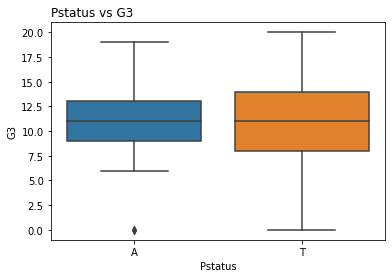

In [25]:
sns.boxplot(x='Pstatus', y='G3', data=students4)
plt.title('Pstatus vs G3', loc='left')

***Wniosek nr 4:*** Nie ma jednoznacznej odpowiedzi. Wydaje się jednak, że uczniowie z rozbitych małżeństw zazwyczaj nie osiągają tak wysokich wyników w nauce jak uczniowie z rodzicami żyjącymi wspólnie.

***Hipoteza nr 5:*** Uczniowie poświęcający więcej czasu na dojazd mają lepsze oceny.

In [22]:
# traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# G3 - final grade (numeric: from 0 to 20, output target)

In [23]:
students5 = students[['traveltime','G3']]
students5.head()

,traveltime,G3
0,2,6
1,1,6
2,1,10
3,1,15
4,1,10


Text(0.0, 1.0, 'Traveltime vs G3')

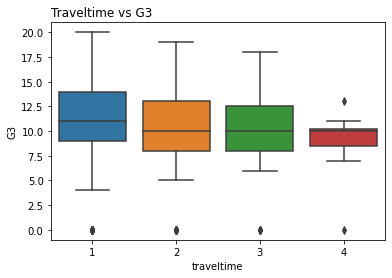

In [27]:
sns.boxplot(x='traveltime',y='G3',data=students5)
plt.title('Traveltime vs G3', loc='left')

***Wniosek nr 5:*** Okazuje się, że im dłuższy dojazd do szkoły, tym wyniki w nauce są gorsze.